In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os 
import csv
from math import log2


sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [51]:
from precision_recall import precision_recall_autcomplete, precision_recall_wiki, precision_recall_linode_from_index, compute_precision_recall_ldiv_pad_scheme

from pwod import run_pwod
from pfs import run_pfs
from mvmd import run_mvmd
from bdk import run_bdk

### Plotting Code

In [42]:
mp_keys = ['\\noDistAlg (\\padFactor=1.25)', '\\ourAlg (\\padFactor=1.25)', '\\lDivAlg{3}', '\\bdkAlg']

In [ ]:
style_dict = {}                # (style, color, marker)

style_dict['\\noDistAlg (\\padFactor=1.25)']    = ('dashed', 'darkgrey', 'o')
style_dict['\\ourAlg (\\padFactor=1.25)']             = ('solid', 'black', 'D')
style_dict['\\lDivAlg{3}']    = ('dashdot', '#047495', 'x')
style_dict['\\bdkAlg']                    = ('dotted', 'blue', 'o')

In [64]:
def plot_precision_recall(plot_mp):
    f, ax = plt.subplots()
    ax.set_xlim(left=0)
    ax.set_xlim(right=1)
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=1)

    # plot_mp = { k:v for k, v in mp.items() if k in mp_keys }

    for method, precision_recall_map in plot_mp.items():
        ax.plot(
            list(precision_recall_map.keys()),
            list(precision_recall_map.values()),
            label=method,
            linestyle=style_dict[method][0],
            color=style_dict[method][1],
            marker=style_dict[method][2],
            linewidth=2)

    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    # plt.title(f'Target Set: Words of Length {seq_len}')
    # plt.legend()

    major_ticks = np.arange(0, 1.1, 0.2)
    minor_ticks = np.arange(0, 1.1, 0.1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # And a corresponding grid
    plt.grid(which='both', alpha=1, linestyle='dotted')

    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(ax.lines))

    plt.show()

### Autocomplete Dataset

In [52]:
dataset = 'autocomplete'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs, _ = run_pfs(dataset, c)

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=1000)

_, _, _, _, pad_scheme_mvmd = run_mvmd(dataset, l)

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed BDK Run 10
Completed BDK Run 11
Completed BDK Run 12
Completed BDK Run 13
Completed BDK Run 14
Completed BDK Run 15
Completed BDK Run 16
Completed BDK Run 17
Completed BDK Run 18
Completed BDK Run 19
Completed BDK Run 20
Completed BDK Run 21
Completed BDK Run 22
Completed BDK Run 23
Completed BDK Run 24
Completed BDK Run 25
Completed BDK Run 26
Completed BDK Run 27
Completed BDK Run 28
Completed BDK Run 29
Completed BDK Run 30
Completed BDK Run 31
Completed BDK Run 32
Completed BDK Run 33
Completed BDK Run 34
Completed BDK Run 35
Completed BDK Run 36
Completed BDK Run 37
Completed BDK Run 38
Completed BDK Run 39
Completed BDK Run 40
Completed B

311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 16 818
0.20048899755501204
('clearer', (306, 306, 383, 383, 383, 306, 306))
Tau: 0; precision=0.05984308879683728, recall=1.0
Tau: 0.1; precision=0.4494932175642808, recall=0.5477472189608253
Tau: 0.2; precision=0.513756471576993, recall=0.5141622399098759
Tau: 0.3; precision=0.513756471576993, recall=0.5141622399098759
Tau: 0.5; precision=0.8265767008348524, recall=0.325806482399134
Tau: 0.75; precision=0.9558328603023056, recall=0.18111119765462658
Tau: 0.8; precision=0.9558328603023056, recall=0.18111119765462658
Tau: 0.9; precision=1.0, recall=0.11838705115459701
Tau: 1; precision=1.0, recall=0.11838705115459701
311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 14 818
0.20048899755501204
('clearer', (306, 306, 383, 383, 383, 306, 306))
Tau: 0; precision=0.0463814398

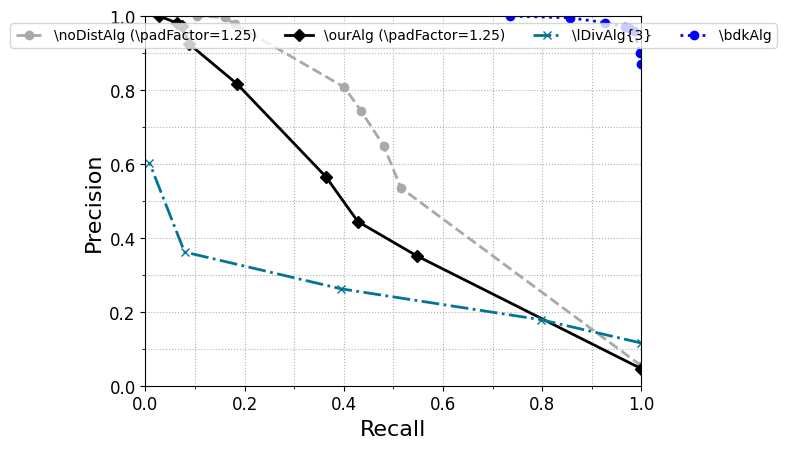

In [63]:
seq_len = 7
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}', dataset=dataset)
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})', dataset=dataset)
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

l = 3
_, _, _, _, pad_scheme_mvmd = run_mvmd(dataset, l)
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 20 564
0.31737588652482257
('perfects', (306, 306, 383, 306, 383, 383, 383, 306))
Tau: 0; precision=0.09532506507384976, recall=1.0
Tau: 0.1; precision=0.416992710960498, recall=0.6361121944645018
Tau: 0.2; precision=0.416992710960498, recall=0.6361121944645018
Tau: 0.3; precision=0.7462620211622686, recall=0.41486936711399214
Tau: 0.5; precision=0.9999990649685188, recall=0.34259757830908755
Tau: 0.75; precision=0.9999990649685188, recall=0.34259757830908755
Tau: 0.8; precision=0.9999990649685188, recall=0.34259757830908755
Tau: 0.9; precision=0.9999990649685188, recall=0.34259757830908755
Tau: 1; precision=1.0, recall=0.33911420830813044
311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 19 564
0.31737588652482257
('perfects', (306, 306, 383, 306, 383, 383, 383, 306))


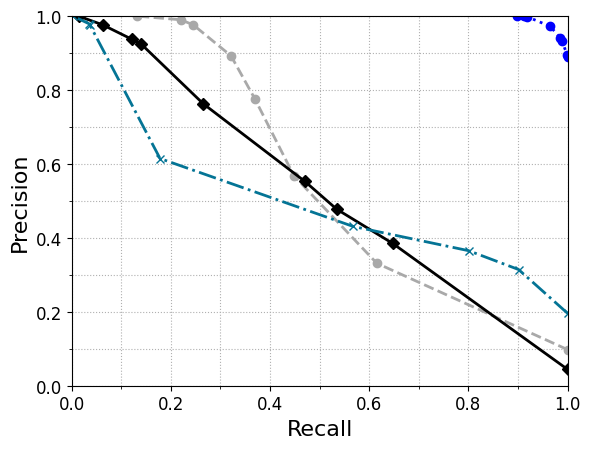

In [58]:
seq_len = 8
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}', dataset=dataset)
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})', dataset=dataset)
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 8 162
0.48765432098765443
('sheetings', (383, 306, 306, 306, 383, 306, 383, 383, 383))
Tau: 0; precision=0.5298794566752004, recall=1.0
Tau: 0.1; precision=0.9068816725980563, recall=0.9912462398957702
Tau: 0.2; precision=0.9068816725980563, recall=0.9912462398957702
Tau: 0.3; precision=0.9068816725980563, recall=0.9912462398957702
Tau: 0.5; precision=0.9643129441412481, recall=0.9416212752064949
Tau: 0.75; precision=0.9643129441412481, recall=0.9416212752064949
Tau: 0.8; precision=0.9643129441412481, recall=0.9416212752064949
Tau: 0.9; precision=0.9643129441412481, recall=0.9416212752064949
Tau: 1; precision=1.0, recall=0.606430523195689
311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 3 162
0.48765432098765443
('sheetings', (383, 306, 306, 306, 383, 306, 383, 383, 383)

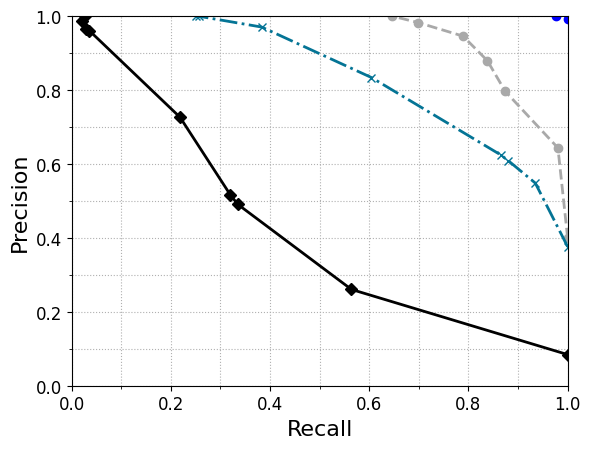

In [59]:
seq_len = 9
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}', dataset=dataset)
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})', dataset=dataset)
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

l = 3
_, _, _, _, pad_scheme_mvmd = run_mvmd(dataset, l)
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Linode from Index dataset

In [93]:
dataset = 'linode_from_index'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs, _ = run_pfs(dataset, c)

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=10)

_, _, _, _, pad_scheme_mvmd = run_mvmd(dataset, l)

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 2.0
i_inf for target sequence length 3 = 6.169925001442312
i_inf for target sequence length 4 = 8.238404739325079
i_inf for target sequence length 5 = 6.599912842187128
i_inf for target sequence length 6 = 5.459431618637297
i_inf for target sequence length 7 = 2.0
Gurobi's optimization method runtime (in seconds): 0.41121387481689453
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 1.7369655941662063
i_inf for target sequence length 3 = 6.078002512001273
i_inf for target sequence length 4 = 8.070857015768077
i_inf for target sequence length 5 = 6.43977317964201
i_inf for target sequence length 6 = 5.459431618637296
i_inf for target sequence length 7 = 2.0
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed 10 runs of BDK.
1
2

Len test seqs: 774
Len observed: 76
Len adversary: 35 774
0.09819121447028431
(('http://192.168.80.128:3000/docs/', 'http://192.168.80.128:3000/docs/databases/', 'http://192.168.80.128:3000/docs/databases/mysql/create-physical-backups-of-your-mariadb-or-mysql-databases/'), (101680, 81339, 81339))
Tau: 0; precision=0.12280701752427321, recall=0.9999999987012987
Tau: 0.1; precision=0.17187499994628905, recall=0.7142857133580706
Tau: 0.2; precision=0.3137254895809304, recall=0.2077922075223478
Tau: 0.3; precision=0.5384615343195267, recall=0.09090909079102716
Tau: 0.5; precision=0.7142857040816327, recall=0.06493506485073369
Tau: 0.75; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 0.8; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 0.9; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 1; precision=0.9999999500000026, recall=0.025974025940293476
Len test seqs: 774
Len observed: 76
Len adversary: 37 774
0.09819121447028431
(('http://192.168.80.

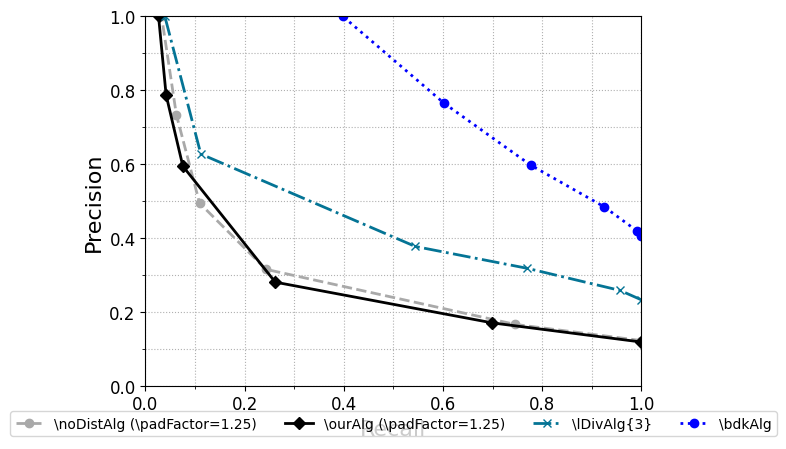

In [95]:
seq_len = 3
recall_precision_mp = precision_recall_linode_from_index(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Wikipedia Dataset

In [96]:
dataset = 'wikipedia'
c = 2
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs, _ = run_pfs(dataset, c)

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=10)

_, _, _, _, pad_scheme_mvmd = run_mvmd(dataset, l)

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

i_inf for target sequence length 1 = 2.584962500721156
i_inf for target sequence length 2 = 4.906890595608519
i_inf for target sequence length 3 = 6.977279923499917
i_inf for target sequence length 4 = 8.727920454563199
i_inf for target sequence length 5 = 9.92035285541508
i_inf for target sequence length 6 = 10.599912842187127
i_inf for target sequence length 7 = 10.896332403909941
Gurobi's optimization method runtime (in seconds): 30.837023973464966
i_inf for target sequence length 1 = 3.000000000003583
i_inf for target sequence length 2 = 5.392317422781854
i_inf for target sequence length 3 = 7.285980105930995
i_inf for target sequence length 4 = 8.898010849849596
i_inf for target sequence length 5 = 10.041089604999843
i_inf for target sequence length 6 = 10.685855785483026
i_inf for target sequence length 7 = 10.969600121534452
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Ru

len test: 4297; len of target: 214
15887859.714285718
Len test seqs: 4297
Len observed: 1906
Len adversary: 134 4297
0.4435652781010005
(('/wiki/Buddhism', '/wiki/Mandaeism', '/wiki/Yarsanism', '/wiki/Iran', '/wiki/Middle_East', '/wiki/Egypt', '/wiki/Architecture_of_Egypt'), (1745780, 871287, 435528, 1745780, 871287, 1745780, 435528))
Tau: 0; precision=0.282205795145751, recall=0.9999999999999937
Tau: 0.1; precision=0.585829643718247, recall=0.9147167966110419
Tau: 0.2; precision=0.7267194031681411, recall=0.8604719912916742
Tau: 0.3; precision=0.762777577721071, recall=0.8392337355014357
Tau: 0.5; precision=0.8528794019021689, recall=0.7563313526595794
Tau: 0.75; precision=0.9989170761455439, recall=0.5304228337219675
Tau: 0.8; precision=0.9989170761455439, recall=0.5304228337219675
Tau: 0.9; precision=0.9999999999999881, recall=0.5276419233236975
Tau: 1; precision=0.9999999999999881, recall=0.5276419233236975
len test: 4297; len of target: 214
14518878.428571422
Len test seqs: 4297
L

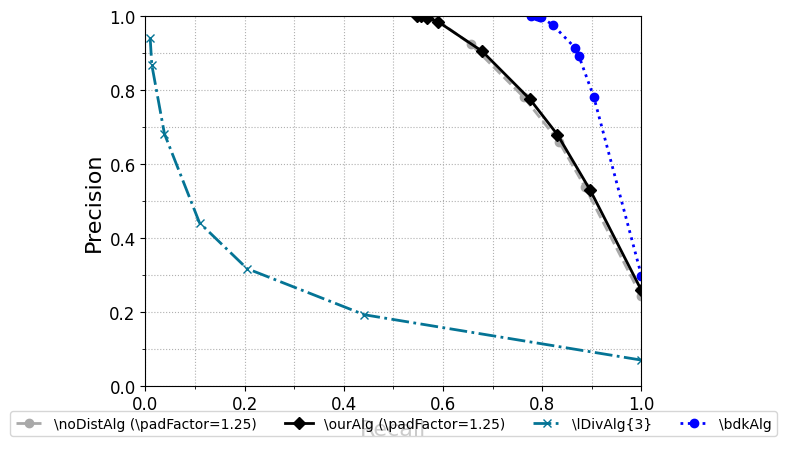

In [97]:
seq_len = 7
recall_precision_mp = precision_recall_wiki(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

In [80]:
plot_mp

{'\\noDistAlg (\\padFactor=1.25)': {},
 '\\ourAlg (\\padFactor=1.25)': {0.9999999999999926: 0.2566492639034973,
  0.8922986987236481: 0.505289309818821,
  0.8098613155423415: 0.6958864523043082,
  0.7632635110157969: 0.7833143582844142,
  0.6676689629420054: 0.910758833471467,
  0.5783253803368773: 0.9876998668659634,
  0.5670042679307573: 0.9931715440568217,
  0.5502461837852535: 0.9989337246221621,
  0.5416090491062993: 0.9999999999999861},
 '\\lDivAlg{3}': {},
 '\\bdkAlg': {0.9999999999995367: 0.021666185978887732}}